In [230]:
# import neccessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
import os 
import warnings
warnings.filterwarnings('ignore')

In [231]:
# data cleaning for OptionMetrics - Security Prices
# Extracting Data from a Single Excel File Containing Multiple Stock Index Information
def data_clearning_for_security_price(original_file_name, saved_file_name):
    index_data_dir = os.path.join(os.getcwd(), 'data', 'index_data', 'unfinish data')
    original_file = pd.read_excel(os.path.join(index_data_dir, original_file_name))

    # Secid: [RUT:102434 DJX: 102456 SPX: 108105]
    filtered_data = original_file[original_file['Security ID'] == 108105]
    filtered_data['The Date for this Price Record'] = filtered_data['The Date for this Price Record'].dt.strftime('%-d/%-m/%Y')

    # Define the path for the new Excel file
    output_excel_path = os.path.join(index_data_dir, saved_file_name)

    # Write the filtered data to a new Excel file
    filtered_data.to_excel(output_excel_path, index=False)

In [232]:
#data_clearning_for_security_price('OptionMetrics - Security Prices.xlsx', 'OptionMetrics - SPX Historical Prices.xlsx')



In [233]:
# data cleaning for OptionMetrics - Standardized Options (CALL)
def data_clearning_for_option(original_file_name, saved_file_name):
    index_data_dir = os.path.join(os.getcwd(), 'data', 'feature_data', 'unfinish data')
    original_file = pd.read_excel(os.path.join(index_data_dir, original_file_name))

    # Secid: [RUT:102434 DJX: 102456 SPX: 108105]
    filtered_data = original_file[original_file['Security ID'] == 108105]
    filtered_data['The Date of this Option Price'] = filtered_data['The Date of this Option Price'].dt.strftime('%-d/%-m/%Y')

    # Define the path for the new Excel file
    output_excel_path = os.path.join(index_data_dir, saved_file_name)

    # Write the filtered data to a new Excel file
    filtered_data.to_excel(output_excel_path, index=False)
    

In [234]:
#data_clearning_for_option('OptionMetrics - Standardized Options (Put only).xlsx', 'OptionMetrics - SPX Standardized Options (PUT).xlsx')



In [235]:
# Avoid data leakage to test data
# Impute missing data in train and test datasets using KNNImputer.
# The following function is unnccessary cuz there is no missing data in these data set
# def impute_data(train, test):
#     imputer = KNNImputer(n_neighbors=5)

#     # Fit the imputer on the training data
#     imputer.fit(train)

#     # Transform both training and testing data
#     train_imputed = imputer.transform(train)
#     test_imputed = imputer.transform(test)

#     return train_imputed, test_imputed

def load_feature_data(start_date, test_start_dates, end_date, rebal_period):
    # Load index data, impute missing values and return train and test datasets
    index_data_dir = os.path.join(os.getcwd(), 'data', 'feature_data')
    result_train_df = pd.DataFrame()
    result_test_df = pd.DataFrame()
    
    index_data_name_file = {
        'US 1 Year Bond Returns': 'US 1 Year Bond Returns.xlsx',
        'US 2 Year Bond Returns': 'US 2 Year Bond Returns.xlsx',
        'US 5 Year Bond Returns': 'US 5 Year Bond Returns.xlsx',
        'US 7 Year Bond Returns': 'US 7 Year Bond Returns.xlsx',
        'US 10 Year Bond Returns': 'US 10 Year Bond Returns.xlsx',
        'US 20 Year Bond Returns': 'US 20 Year Bond Returns.xlsx',
        'US 30 Day Bill Returns': 'US 30 Day Bill Returns.xlsx',
        'US 30 Year Bond Returns': 'US 30 Year Bond Returns.xlsx',
        'US 90 Day Bill Returns': 'US 90 Day Bill Returns.xlsx',
        'US Rate of Change in Consumer Price Index': 'US Rate of Change in Consumer Price Index.xlsx'
    }
    
    for ind_name in index_data_name_file.keys():
        try:
            input = pd.read_excel(os.path.join(index_data_dir, index_data_name_file[ind_name]), index_col='Date')
             # Ensure that the index is a DatetimeIndex
            input.index = pd.to_datetime(input.index)
            input = input.sort_index(ascending=False)
            
            index_df = input.iloc[:, 0].resample(rebal_period).first()
            
            # Split the data into train and test based on the provided dates
            train_data = index_df.loc[start_date:test_start_dates]
            test_data = index_df.loc[test_start_dates:end_date]
            
            # Rename the series for clarity
            train_data.rename(ind_name, inplace=True)
            test_data.rename(ind_name, inplace=True)
            
            result_train_df = pd.concat([result_train_df, train_data], axis=1)
            result_test_df = pd.concat([result_test_df, test_data], axis=1)
            
        except Exception as e:
            print(f"Error processing file: {index_data_name_file[ind_name]}")
            print(str(e))
            continue
        
    result_train_df.index = pd.to_datetime(result_train_df.index)
    result_test_df.index = pd.to_datetime(result_test_df.index)

    return result_train_df, result_test_df
        

In [236]:
# Define general parameters
train_start_date = '1/1/2007'
test_start_date = '1/1/2017'
test_end_date = '31/12/2022'
rebal_period = '1M'
train_data, test_data = load_feature_data(train_start_date, test_start_date, test_end_date, rebal_period)

In [237]:
train_data

,US 1 Year Bond Returns,US 2 Year Bond Returns,US 5 Year Bond Returns,US 7 Year Bond Returns,US 10 Year Bond Returns,US 20 Year Bond Returns,US 30 Day Bill Returns,US 30 Year Bond Returns,US 90 Day Bill Returns,US Rate of Change in Consumer Price Index
2007-01-31,0.003995,0.001951,-0.000763,-0.001775,-0.003600,-0.007534,0.004328,-0.010679,0.004410,0.003053
2007-02-28,0.005063,0.008344,0.015508,0.018779,0.019999,0.028796,0.003837,0.035901,0.003807,0.005350
2007-03-31,0.003904,0.004382,0.003053,0.001164,-0.002247,-0.012110,0.004257,-0.021418,0.004365,0.009106
2007-04-30,0.003403,0.003723,0.004633,0.005634,0.006799,0.008095,0.004348,0.008677,0.004529,0.006496
2007-05-31,0.002538,-0.001889,-0.011059,-0.013946,-0.014483,-0.020529,0.004046,-0.025944,0.004487,0.006111
2007-06-30,0.004246,0.004189,0.000799,-0.001106,-0.006804,-0.008926,0.003918,-0.013263,0.003801,0.001938
2007-07-31,0.006321,0.010287,0.018827,0.021695,0.023884,0.030381,0.003962,0.039013,0.004037,-0.000254
2007-08-31,0.007002,0.010008,0.017403,0.022029,0.017130,0.017484,0.004205,0.014998,0.005694,-0.001834
2007-09-30,0.005447,0.006878,0.004294,0.002781,-0.000440,0.001447,0.003347,0.002330,0.003905,0.002756
2007-10-31,0.003567,0.004278,0.007296,0.009846,0.013082,0.015780,0.003212,0.018432,0.003145,0.002139


In [238]:
test_data

,US 1 Year Bond Returns,US 2 Year Bond Returns,US 5 Year Bond Returns,US 7 Year Bond Returns,US 10 Year Bond Returns,US 20 Year Bond Returns,US 30 Day Bill Returns,US 30 Year Bond Returns,US 90 Day Bill Returns,US Rate of Change in Consumer Price Index
2017-01-31,0.001536,0.000848,0.002885,0.002368,0.002167,0.001949,0.000358,0.003438,0.000476,0.005828
2017-02-28,0.000055,0.000628,0.000809,0.003661,0.007423,0.012049,0.000364,0.014700,0.000352,0.003146
2017-03-31,0.000026,0.001442,0.003220,0.003138,0.002424,0.000421,0.000353,-0.000788,0.000384,0.000813
2017-04-30,0.000494,0.001317,0.007231,0.009559,0.011063,0.013358,0.000537,0.013940,0.000617,0.002966
2017-05-31,0.000730,0.001096,0.004701,0.007299,0.007856,0.014953,0.000614,0.019849,0.000588,0.000855
2017-06-30,0.000320,-0.000752,-0.003845,-0.005711,-0.001307,0.000066,0.000617,0.011944,0.000873,0.000907
2017-07-31,0.001660,0.001994,0.004778,0.004046,-0.000007,-0.004422,0.000722,-0.014681,0.000917,-0.000690
2017-08-31,0.001338,0.001622,0.007760,0.012751,0.017123,0.029059,0.000827,0.038103,0.000978,0.002994
2017-09-30,-0.000121,-0.001865,-0.008855,-0.012461,-0.017151,-0.020094,0.000944,-0.024410,0.000802,0.005295
2017-10-31,0.000230,-0.000788,-0.001956,-0.001771,-0.001133,-0.000815,0.000840,-0.001464,0.000939,-0.000632


In [239]:
# get target index data
def index_cum_data_loading(start_date, test_start_dates, end_date, rebal_period):
    index_data_dir = os.path.join(os.getcwd(), 'data', 'index_data')
    result_train_df = pd.DataFrame()
    result_test_df = pd.DataFrame()
    
    index_data_name_file = {
        'OCRSP Daily Stock Market Indexes - Cumulative of the S&P 500 Index': 'CRSP Daily Stock Market Indexes - Level of the S&P 500 Index.xlsx'
    }
    
    for ind_name in index_data_name_file.keys():
        try:
            input = pd.read_excel(os.path.join(index_data_dir, index_data_name_file[ind_name]), index_col='Date')
            # Ensure that the index is a DatetimeIndex
            input.index = pd.to_datetime(input.index)
            input = input.sort_index(ascending=False)
            
            reb_index = input.iloc[:, 0].resample(rebal_period).first()
            index_df = reb_index / reb_index.iloc[0]
            
             # Split the data into train and test based on the provided dates
            train_data = index_df.loc[start_date:test_start_dates]
            test_data = index_df.loc[test_start_dates:end_date]
            
            result_train_df = pd.concat([result_train_df, train_data], axis=1)
            result_test_df = pd.concat([result_test_df, test_data], axis=1)
            
            
        except Exception as e:
            print(f"Error processing file: {index_data_name_file[ind_name]}")
            print(str(e))
            continue
        
    result_train_df.index = pd.to_datetime(result_train_df.index)
    result_test_df.index = pd.to_datetime(result_test_df.index)

    return result_train_df, result_test_df

In [240]:
index_train_data, index_test_data = index_cum_data_loading(train_start_date, test_start_date, test_end_date, rebal_period)

In [241]:
index_train_data

,Level of the S&P 500 Index
2007-01-31,1.000000
2007-02-28,1.020712
2007-03-31,0.990520
2007-04-30,1.005612
2007-05-31,1.049202
2007-06-30,1.084526
2007-07-31,1.072589
2007-08-31,1.034738
2007-09-30,1.051405
2007-10-31,1.092080


In [242]:
index_test_data

,Level of the S&P 500 Index
2017-01-31,1.593837
2017-02-28,1.609170
2017-03-31,1.691345
2017-04-30,1.665142
2017-05-31,1.685959
2017-06-30,1.715417
2017-07-31,1.714676
2017-08-31,1.748094
2017-09-30,1.748235
2017-10-31,1.785345


In [243]:
def plot_target_index(index_train_data):
    ax = index_train_data.plot()
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(float(x))))
    plt.xlabel('Date')
    plt.ylabel('Cumulative P&L')
    plt.title('Cumulative Profit and Loss')
    plt.show()

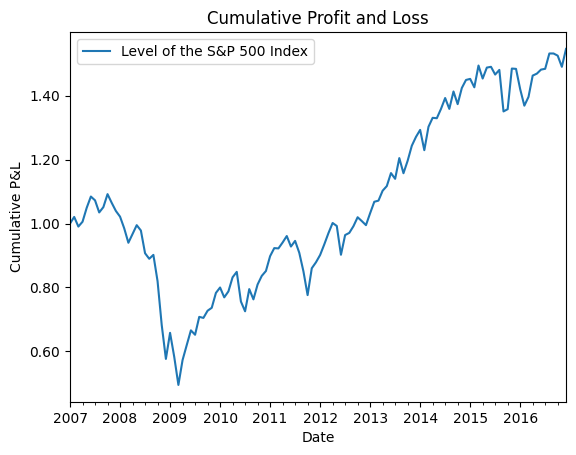

In [244]:
plot_target_index(index_train_data)

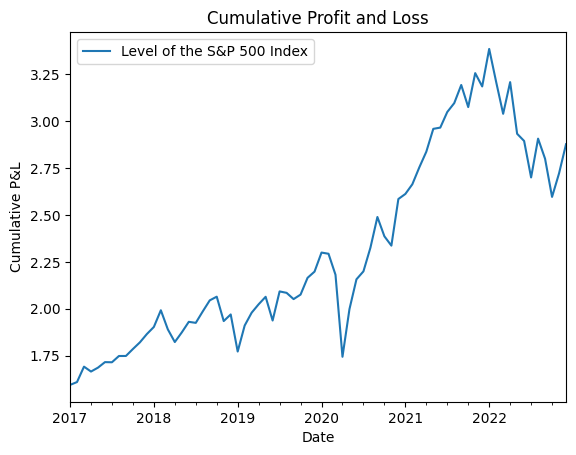

In [245]:
plot_target_index(index_test_data)

In [246]:
train_market_data = train_data.join(index_train_data, how = 'right')
test_market_data = test_data.join(index_test_data, how = 'right')

In [247]:
# Trying different method for feature selection
# 1. Adjust display options to show the full correlation matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train_market_data.corr()

,US 1 Year Bond Returns,US 2 Year Bond Returns,US 5 Year Bond Returns,US 7 Year Bond Returns,US 10 Year Bond Returns,US 20 Year Bond Returns,US 30 Day Bill Returns,US 30 Year Bond Returns,US 90 Day Bill Returns,US Rate of Change in Consumer Price Index,Level of the S&P 500 Index
US 1 Year Bond Returns,1.000000,0.892435,0.626451,0.534816,0.437927,0.329823,0.659155,0.323747,0.767626,-0.070238,-0.142149
US 2 Year Bond Returns,0.892435,1.000000,0.831384,0.718474,0.597199,0.478773,0.420278,0.462852,0.530996,-0.159972,-0.167599
US 5 Year Bond Returns,0.626451,0.831384,1.000000,0.966075,0.898991,0.792211,0.165631,0.750626,0.246449,-0.248342,-0.118353
US 7 Year Bond Returns,0.534816,0.718474,0.966075,1.000000,0.965110,0.889228,0.116808,0.841807,0.185397,-0.258271,-0.120942
US 10 Year Bond Returns,0.437927,0.597199,0.898991,0.965110,1.000000,0.956228,0.071048,0.918161,0.129204,-0.243083,-0.104648
US 20 Year Bond Returns,0.329823,0.478773,0.792211,0.889228,0.956228,1.000000,0.019702,0.980295,0.061226,-0.300143,-0.058833
US 30 Day Bill Returns,0.659155,0.420278,0.165631,0.116808,0.071048,0.019702,1.000000,0.023297,0.973391,0.207873,-0.080817
US 30 Year Bond Returns,0.323747,0.462852,0.750626,0.841807,0.918161,0.980295,0.023297,1.000000,0.062858,-0.325330,-0.041281
US 90 Day Bill Returns,0.767626,0.530996,0.246449,0.185397,0.129204,0.061226,0.973391,0.062858,1.000000,0.170759,-0.084714
US Rate of Change in Consumer Price Index,-0.070238,-0.159972,-0.248342,-0.258271,-0.243083,-0.300143,0.207873,-0.325330,0.170759,1.000000,-0.007289


In [248]:
# 2. Recursive Feature Elimination (RFE) for Regression
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(train_data, index_train_data.values.ravel())
selected_features_rfe = train_data.columns[fit.support_]
print('use RFE')
print("Num Features:", fit.n_features_)
print("Selected Features:", selected_features_rfe)
print("Feature Ranking:", fit.ranking_)

use RFE
Num Features: 5
Selected Features: Index(['US 1 Year Bond Returns', 'US 2 Year Bond Returns',
       'US 5 Year Bond Returns', 'US 30 Day Bill Returns',
       'US 90 Day Bill Returns'],
      dtype='object')
Feature Ranking: [1 1 1 2 3 4 1 6 1 5]


In [249]:
# 3. Feature Importance from RandomForest
# If it's regression:
forest = RandomForestRegressor(n_estimators=100)
# If it's classification:
# forest = RandomForestClassifier(n_estimators=100)

forest.fit(train_data, index_train_data.values.ravel())
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print("RandomForest: Feature ranking:")
for f in range(train_data.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, train_data.columns[indices[f]], importances[indices[f]]))

RandomForest: Feature ranking:
1. Feature US 30 Day Bill Returns (0.239953)
2. Feature US 90 Day Bill Returns (0.156759)
3. Feature US 1 Year Bond Returns (0.138462)
4. Feature US 2 Year Bond Returns (0.111388)
5. Feature US Rate of Change in Consumer Price Index (0.107225)
6. Feature US 5 Year Bond Returns (0.073810)
7. Feature US 30 Year Bond Returns (0.054873)
8. Feature US 10 Year Bond Returns (0.042115)
9. Feature US 7 Year Bond Returns (0.037981)
10. Feature US 20 Year Bond Returns (0.037434)


In [250]:
# 4. Univariate Selection using SelectKBest
print('use Univariate Selection using SelectKBest')
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(train_data, index_train_data.values.ravel())
selected_features_skb = train_data.columns[fit.get_support()]
print("Selected Features:", selected_features_skb)

use Univariate Selection using SelectKBest
Selected Features: Index(['US 20 Year Bond Returns', 'US 30 Day Bill Returns',
       'US 30 Year Bond Returns', 'US 90 Day Bill Returns',
       'US Rate of Change in Consumer Price Index'],
      dtype='object')


# Final Decision on Features to Consider
1. Moving Average
2. OptionMetrics - Russell 2000 Strike Price, Current Always Equals to Forward Price (CALL)
3. OptionMetrics - Russell 2000 Strike Price, Current Always Equals to Forward Price (PUT)
4. OptionMetrics - Zero Coupon Yield Curve
5. OptionMetrics - DJX The total contract open interest
6. OptionMetrics - SPX Strike Price, Currently Always Equal to Forward Price (CALL)
7. US 1 Year Bond Returns
8. US 2 Year Bond Returns
9. US 5 Year Bond Returns
10. US 30 Day Bill Returns
11. US 90 Day Bill Returns
12. US Rate of Change in Consumer Price Index

# Next Step
1. Construct Moving Average
2. Get the data from CRSP (market index) cuz the index data from OptionMetrics is inaccurate enough

NameError: name 'train_data' is not defined